# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [61]:
import math
import sys

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [63]:
# YOUR CODE HERE

df = pd.read_csv(
    'https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz',
    sep='\t')
df.sample(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
895,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
572,10.2,0.240,0.49,2.4,0.075,10.0,28.0,0.99780,3.14,0.61,10.4,5
1047,7.1,0.430,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,10.4,5
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
208,7.8,0.440,0.28,2.7,0.100,18.0,95.0,0.99660,3.22,0.67,9.4,5
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5,5
1152,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
222,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.5,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [64]:
#Your Code Here

df.info()

print(f'Max Target Rating:',df['target'].max())

print(f'Minimum Target Rating:',df['target'].min())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Max Target Rating: 8
Minimum Target Rating: 3


1. Fixed Acidity: Non-volatile acids that stay in the wine and do not evaporate. They provide the wine’s foundational sourness and structure.

2. Volatile Acidity: Acids that evaporate easily during the fermentation process. They can produce a vinegar like flavor (which, I assume is undesireable).

3. Citric Acid: A natural acid found in small amounts in red wine that adds freshness and can improve flavor stability.

4. Residual Sugar: The sugar left after the wine fermentation process. Red wines are typically dry so most values are lower, however,  higher values make the wine taste sweeter and fuller.

5. Chlorides: This represents the salt content in the wine. High chloride levels can make the wine taste salty or flat that are often due to soil or winemaking conditions.

6. Free Sulfur Dioxide: Active form of SO₂ that protects wine from oxidation and bacteria. Too much SO₂ can create a sharp "sulfur" smell, but some amount is needed for stability.

7. Total Sulfur Dioxide: Total amount of SO₂ (free + bound). Higher levels improve preservation but excessive S02 can affect flavor and aroma. The binding of S02 occurs during fermentation with other aspects in the wine - like sugar.

*note: free sulfur dioxide is more effective at wine preservation by preventing oxidation or bacterial breakdown. 

8. Denisty: Calculated mass per unit volume of wine. This is closely related to sugar content (ie higher sugar means higher density). As I saw in the white wine data set the correlation was strongest between density and residual sugar.

9. Ph: The measure of acidty on a scale of 0 to 14. Lower = more acidic (brighter and crsipier wine), higher = more basic (softer and less resistant to bacterial growth).

10. Sulphates: Sulfur-containing compounds that help control bacterial growth (ie preservation) and add to the wine’s structure. Sulphates are often added to wine for the preservation aspect.

12. Alcohol: Precentage of alcohol by volume. Alochol can contribute to warmth within the texture and flavor profile.

13. Target: The quality score assigned by taste testers for each wine sample. In this dataset the minimum target rating printed is 3 and the maximum 8. The higher the target value means a more favorable outcome for a wine sample (ie rated better).

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  target  
0      9.4       5  
1      9.8       5  
2      9.8       5  
3 

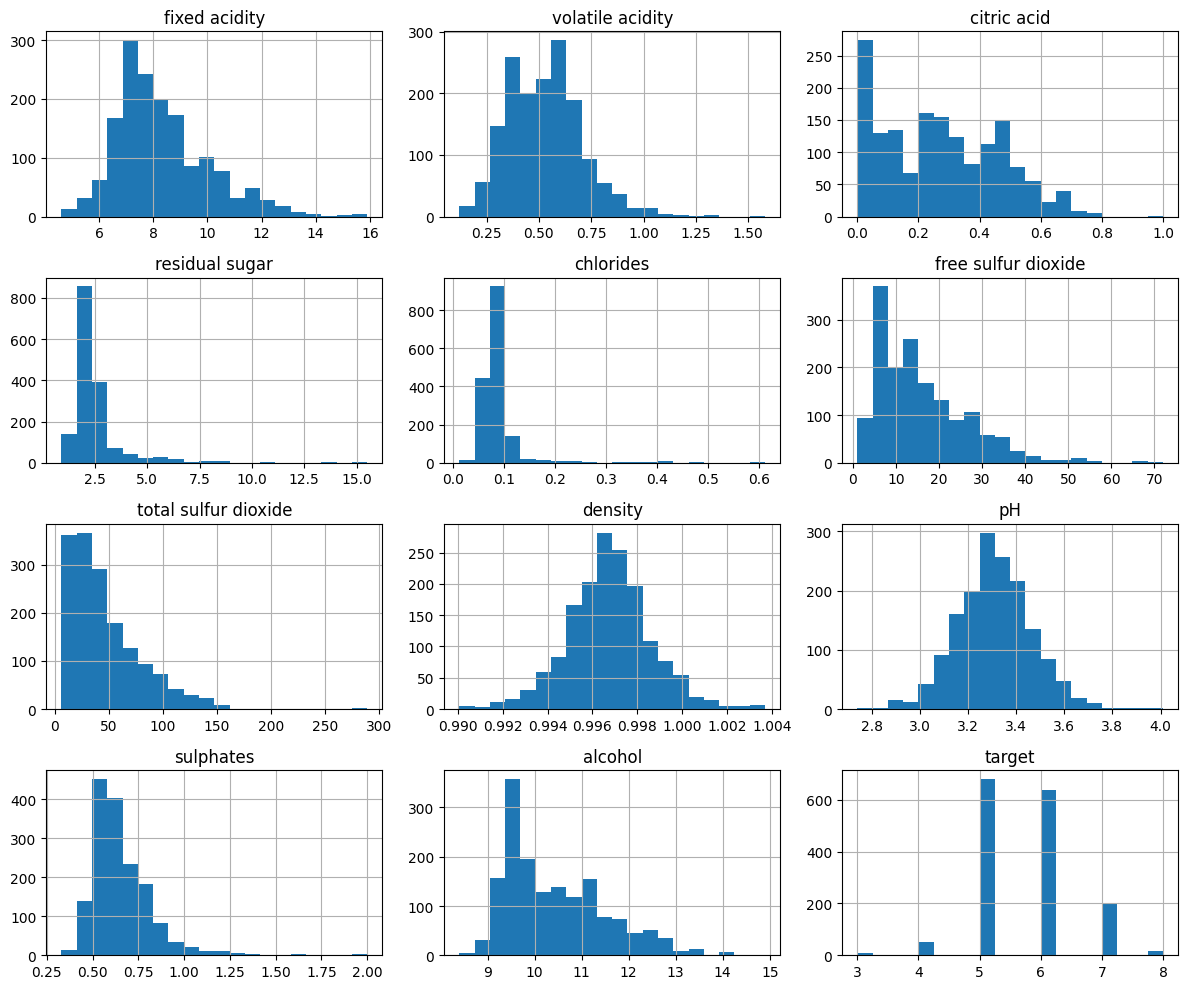

Skewness Feature Ratings
fixed acidity: 0.9818
volatile acidity: 0.6710
citric acid: 0.3180
residual sugar: 4.5364
chlorides: 5.6750
free sulfur dioxide: 1.2494
total sulfur dioxide: 1.5141
density: 0.0712
pH: 0.1935
sulphates: 2.4264
alcohol: 0.8600
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.26

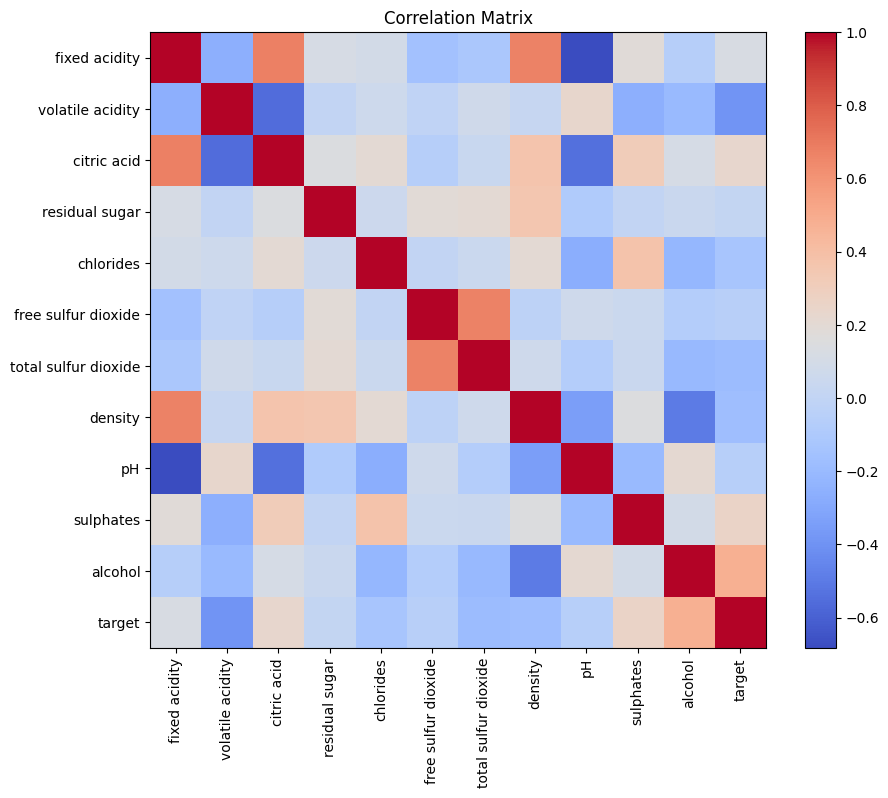

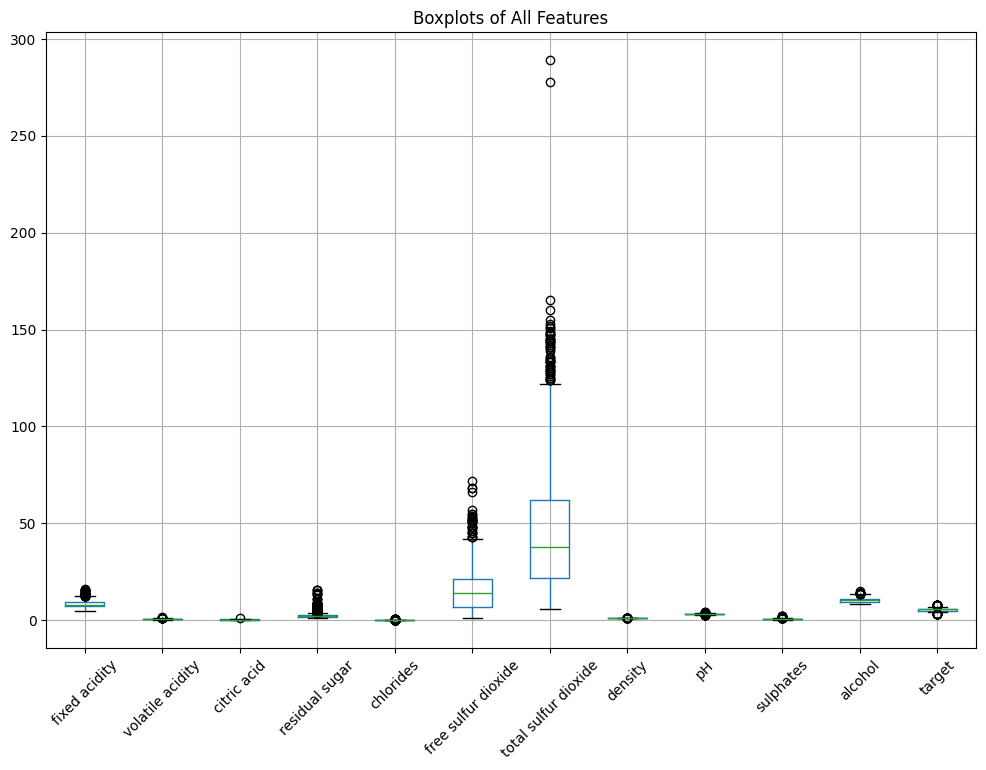

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


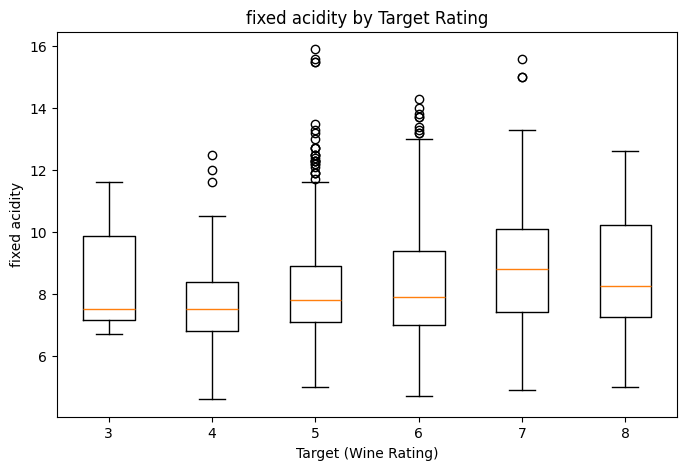

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


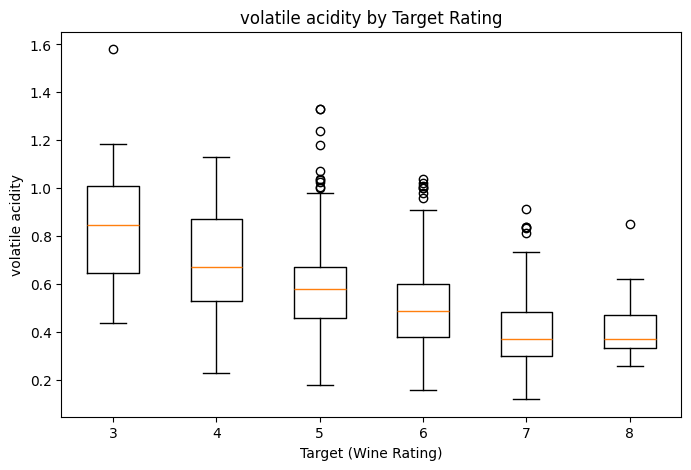

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


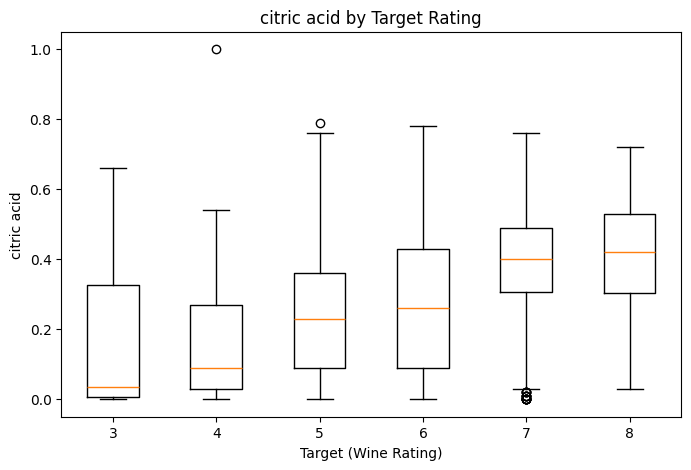

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


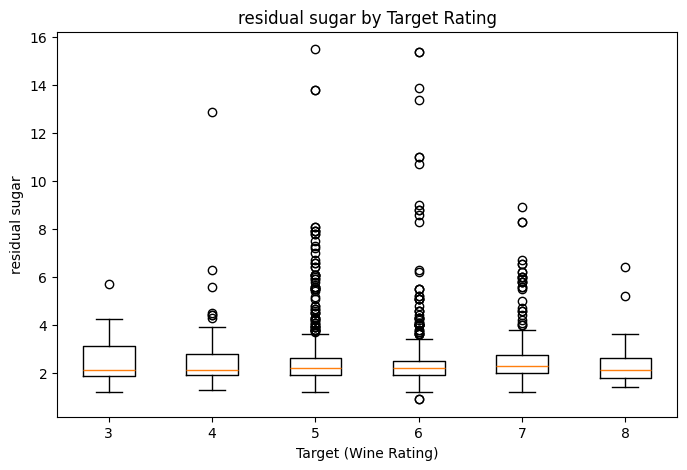

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


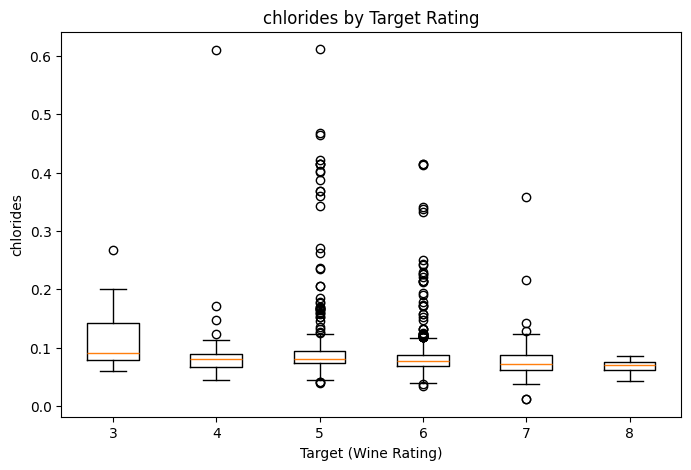

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


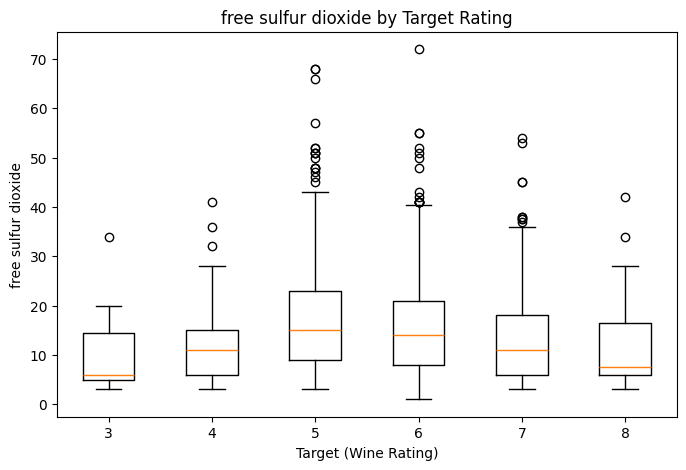

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


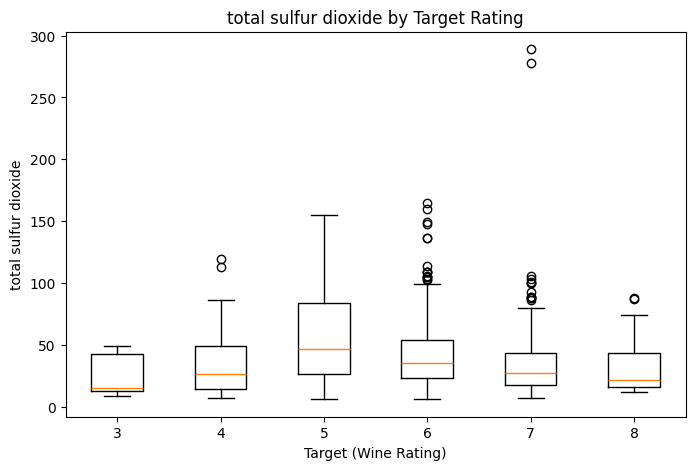

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


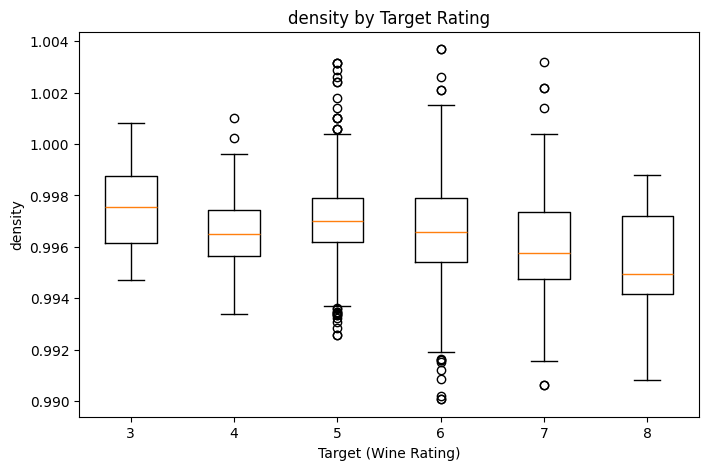

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


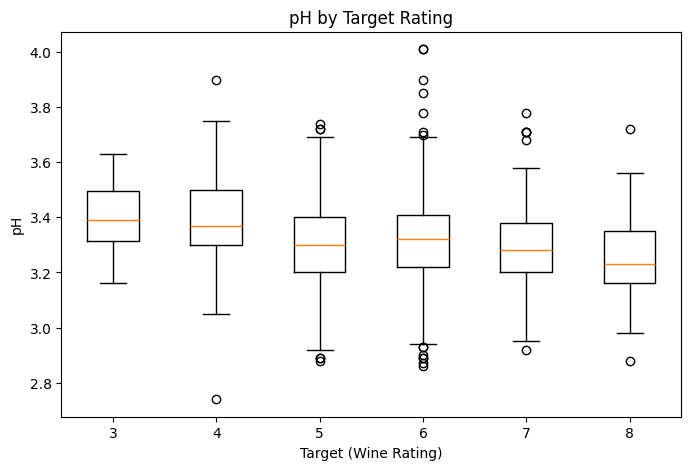

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


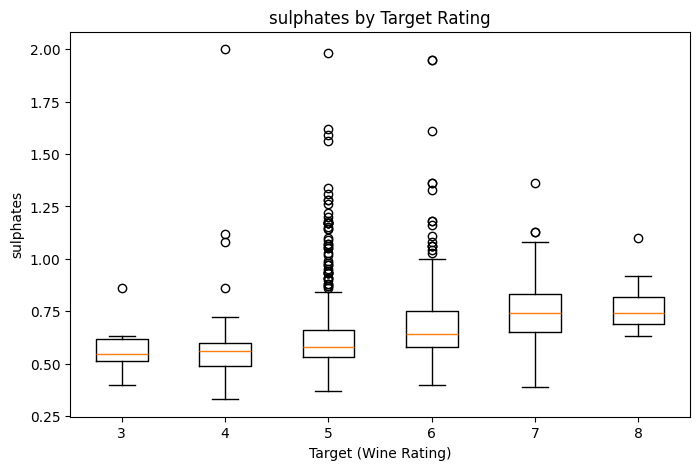

/tmp/ipykernel_2356/4014512835.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_target, labels=target_values)


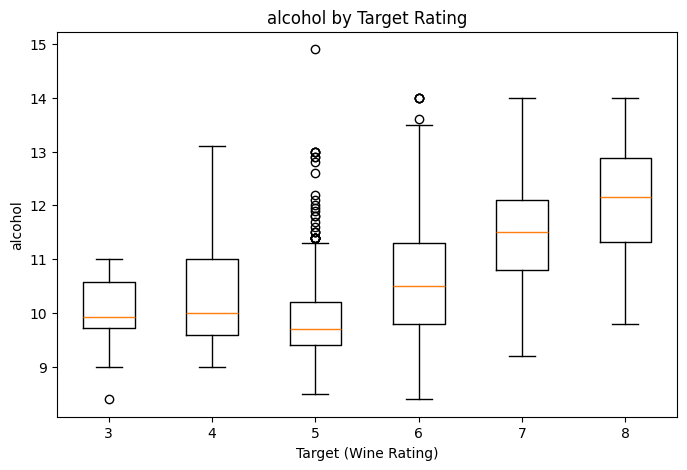

/tmp/ipykernel_2356/4014512835.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


**********Below are the 3 Interesting Charts Chosen****************************** 


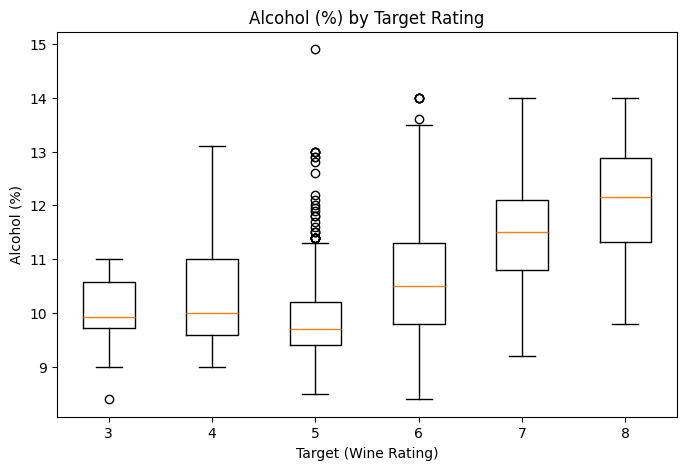

/tmp/ipykernel_2356/4014512835.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


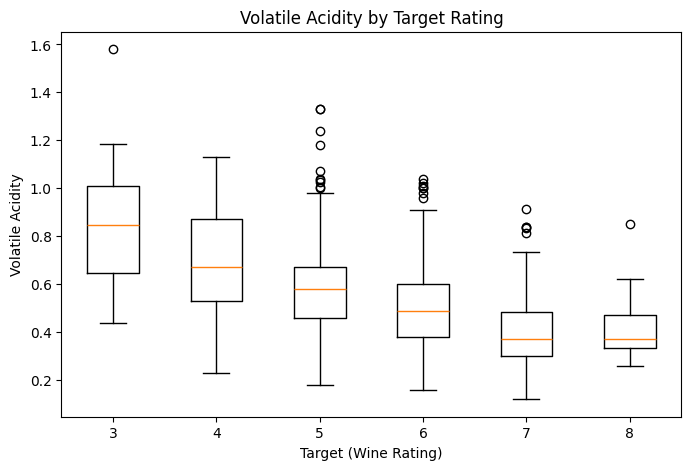

/tmp/ipykernel_2356/4014512835.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


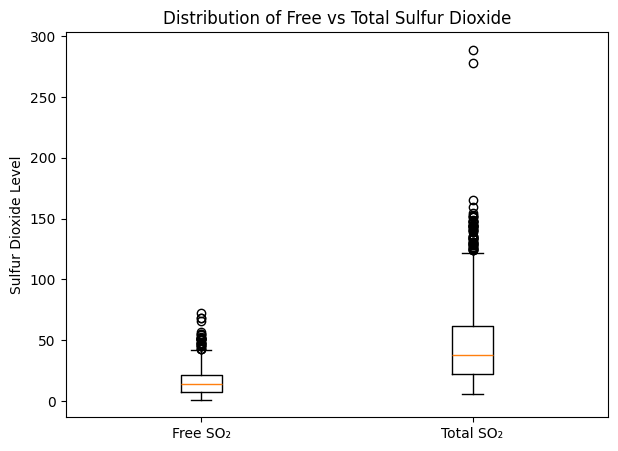

In [65]:
# YOUR CODE HERE

#general dataset structure
print(df.head())
print(df.info())
print(df.describe())

#check for null values
print(df.isnull().sum())

#histogram of each feature
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


print('Skewness Feature Ratings')
for col in df.columns:
    if col != "target":
        skew_value = scipy.stats.skew(df[col])
        print(f"{col}: {skew_value:.4f}")

#correlation matrix
corr = df.corr()
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


#box plot outlier view
plt.figure(figsize=(12,8))
df.boxplot(rot=45)
plt.title("Boxplots of All Features")
plt.show()

#indiviudal features and relationship to target with boxplots
features = [col for col in df.columns if col != "target"]

# Sorted list of unique target values
target_values = sorted(df["target"].unique())

for feature in features:
    plt.figure(figsize=(8,5))

    # Create a list of arrays, one per target category
    data_by_target = [df[df["target"] == t][feature] for t in target_values]

    plt.boxplot(data_by_target, labels=target_values)

    plt.xlabel("Target (Wine Rating)")
    plt.ylabel(feature)
    plt.title(f"{feature} by Target Rating")
    plt.show()






print('**********Below are the 3 Interesting Charts Chosen****************************** ')
#box plot linear relationship view, alcohol
plt.figure(figsize=(8,5))
plt.boxplot(
    [df[df["target"] == t]["alcohol"] for t in sorted(df["target"].unique())],
    labels=sorted(df["target"].unique())
)
plt.xlabel("Target (Wine Rating)")
plt.ylabel("Alcohol (%)")
plt.title("Alcohol (%) by Target Rating")
plt.show()

#box plot linear relationship view, volatile acid
plt.figure(figsize=(8,5))
plt.boxplot(
    [df[df["target"] == t]["volatile acidity"] for t in sorted(df["target"].unique())],
    labels=sorted(df["target"].unique())
)
plt.xlabel("Target (Wine Rating)")
plt.ylabel("Volatile Acidity")
plt.title("Volatile Acidity by Target Rating")
plt.show()


#free and total sulfur box plot data spreads
plt.figure(figsize=(7,5))

plt.boxplot(
    [df["free sulfur dioxide"], df["total sulfur dioxide"]],
    labels=["Free SO₂", "Total SO₂"]
)

plt.ylabel("Sulfur Dioxide Level")
plt.title("Distribution of Free vs Total Sulfur Dioxide")
plt.show()



                            ****Data Exploration***
After loading the dataset and performing df.head(), df.info(), and df.isnull().sum(), we obtain three important pieces of information about the red wine quality data:

1. First Five Rows (df.head())
The first five rows display the first five wine samples in the dataset across all 12 features. Each row represents a single wine sample, and, each column represents either a chemical measurement or the wine’s quality rating (stored in the target column).

For example:

Row 0 represents a single wine sample with:

fixed acidity = 7.4
volatile acidity = 0.70
residual sugar = 1.9
alcohol (ABV) = 9.4%
target rating = 5

Row 3 is interesting because it has:

Significantly higher fixed acidity (11.2)
Significantly higher citric acid (0.56)
Slightly higher alcohol (9.8%)
A better target rating (6)

Viewing the head of the dataset gives an immediate sense of the typical ranges and variability of the features across different wines.

2. The df.info() output indicates:

The dataset contains 1599 rows, meaning, we have 1599 individual wine samples.
There are 12 total columns including 11 chemical or physical feature inputs and one target rating.
All feature values are stored as numeric types (floats or integers), which is ideal for statistical modeling and machine learning. *However*, keep in mind that the target variable is categorical and bound between 3 and 8 on this dataset. Below I will explain the method I chose to best graphically view this data.

3. The output of df.isnull().sum() shows 0 missing values in every column.

No entries are blank
No fields contain NaN
All 1599 rows have complete data across all 12 columns
This is helpful because it simplifies preprocessing: we do not need to drop or fill missing values, and, we can begin to consider modeling techniques to be applied.


4. Distribution of Data with Skewness Calculation:

*Note, skewness is generally seen as:

- < .5 = approximately symetric/normall distributed
- .5 < 1.0 = moderately skewed, visible on a histogram
- 1.0 < 2.0 = strong skew, tail is very visible on histogram
- > 2.0 = heavy skew, asymetric histogram

--fixed acidity — 0.9818 (moderate positive skew)

Fixed acidity is right-skewed, meaning most wines have lower acidity values with fewer wines having unusually high acidity. There is a noticeable tail toward high-acidity wines indicating some outliers or rare high acidic samples.

--volatile acidity — 0.6710 (moderate positive skew)

Volatile acidity is moderately right-skewed suggesting most wines fall in a lower/typical range. A minority of samples have unusually high volatile acidity (vinegar-like character, mentioned in problem 2). 

--citric acid — 0.3180 (slight positive skew)

Citric acid is only slightly right-skewed, meaning, its distribution is fairly close to symmetric. Most wine samples cluster around the center citric acid values, with a small number having higher amounts.

--residual sugar — 4.5364 (extremely positive skew)

Residual sugar is very heavily right-skewed. Most red wines are dry and contain low sugar levels, but a small portion contain much higher residual sugar creating a long right tail. This is one of the most skewed features in the dataset. These values may be outliers and can impact a model.

--chlorides — 5.6750 (extremely positive skew)

Chlorides are extremely right-skewed, suggesting that most wines have low salt levels but a few samples contain unusually high chloride concentrations. These high values may be outliers and could influence modeling.

--free sulfur dioxide — 1.2494 (moderate to high positive skew)

Free S02 is positively skewed, meaning, most wines have relatively low preservative levels but some wines have much higher free S02. 

--total sulfur dioxide — 1.5141 (high positive skew)

Total S02 also shows a strong right skew indicating higher variability. Most wines have moderate total S02 levels but a subset have very high concentrations.

--density — 0.0712 (very slight positive skew)

Density is nearly symmetric with only a negligible skew. 

--pH — 0.1935 (slight positive skew)

Ph is slightly right-skewed, however, essentially close to symmetric. 

--sulphates — 2.4264 (high positive skew)

Sulphates show strong right skew indicating that most wines contain moderate sulphate levels while a subset have much higher amounts.

--alcohol — 0.8600 (moderate positive skew)

Alcohol percentage is moderately right-skewed. It seems a small subset of wines contain a higher ABV.


5. Correlation Matrix:

The Correlation Matrix does show relationships between input variables and the output variable of target, both negative and positive.

Inputs positively related to Target:
Alcohol:	    +0.476	Strongest positive 
Citric Acid:	+0.226	Weak, but positive
Fixed Acidity:	+0.124	Very weak, but positive
Residual Sugar:	+0.115	Very weak, but positive
Chlorides:	    +0.094	Very weak, but positive
Sulphates:	    +0.094	Very weak, but positive

Inputs negatively related to Target:
Volatile Acidity:	    –0.391	Strong negative
Total Sulfur Dioxide:	–0.113	Weak, but negative
Free Sulfur Dioxide:	–0.154	Weak, but negative
pH:                     –0.206	Weak-to-moderate negative
Density	                 –0.000 no correlation


                                          ***3 interesting Graphs and Visuals***

1. Alcohol positive linear relationship to Target (box plot):
          
          If you look at the box plot of Alcohol By Volume to Target you can see a visible relationship of increasing ABV to increasing target ratings. Meaning - higher alcohol equates to higher target rating. This is confirmed in the correlation matrix with Alcohol having the highest overall correlation value at a positive .476. Note - I chose box plots to show a linear relationship bc the target variable is categorical...you can see the box plots shifting upwards/to the right along with the medians with Alcohol. When forming a model an assumptions I would definately ensure this feature is included because its data is normally distributed (mostly) with no missing values.


2. Volatile Acid negative linear relationship to Target (box plot):

          This feature has decreasing box plot positions going down and to the right, along with their medians. This indicates a negative relationship of Volatile Acids to desired wine target scores. In addition- Volatile Acid has the second highest correlation in the correlation matrix at -.391. When forming a model an assumptions I would definately ensure this feature is included because its data is acceptably distributed (slight right skew) with no missing values.

3. Free Sulfur and Total Sulfur Dioxide Box Plot data distributions:

          Both of these box plots contained high outlier points - the largest in the dataset. Both of these features also showed a positive correlation to each other, too. This makes me think there could possibly be measuring errors with some of the samples with regards to sulfur measurings. These outliers could impact a data model and this should be considered while building a model to predict the target variable.
           





YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
target                     0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

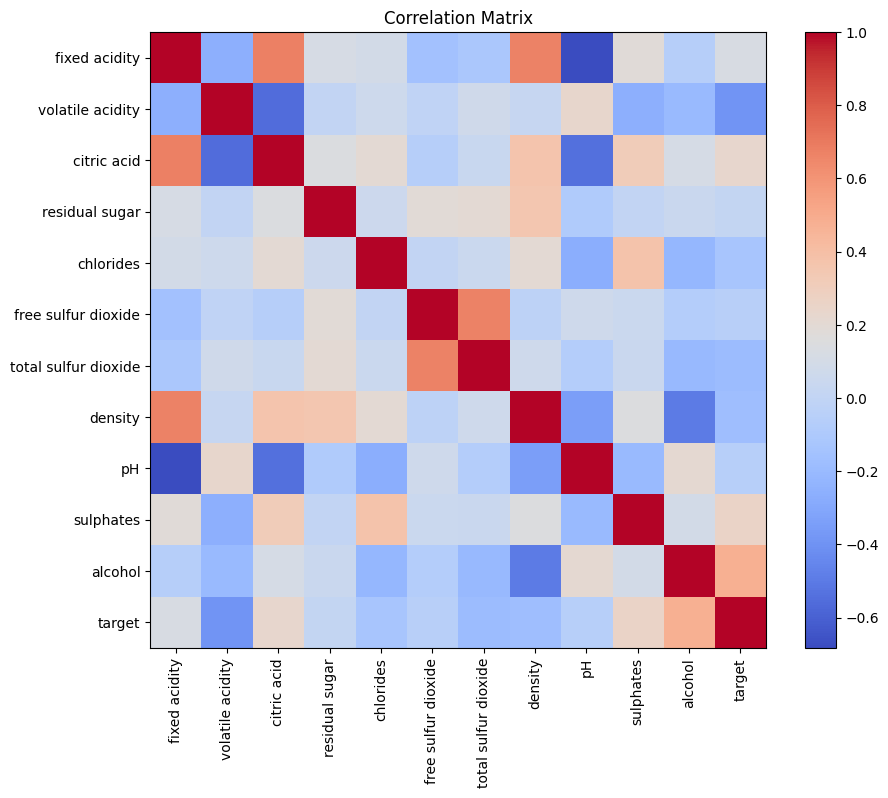

In [66]:
# YOUR CODE HERE

#correlation matrix
corr = df.corr()
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()




Fixed Acidity and Citric Acid showed the highest two related features at .671.

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [67]:
# YOUR CODE HERE



Model 1: LinearRegression (Ordinary Least Squares)
Documentation:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
Description: https://en.wikipedia.org/wiki/Linear_regression?utm
 

Model 2: DecisionTreeRegressor
Documentation:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
Description: https://en.wikipedia.org/wiki/Decision_tree_learning

Model 3: RandomForestRegressor
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Explanation: https://en.wikipedia.org/wiki/Random_forest?
 

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression
  L2 (MSE): 0.4168
  L1 (MAE): 0.5005

Decision Tree
  L2 (MSE): 0.3502
  L1 (MAE): 0.4576

Random Forest
  L2 (MSE): 0.3046
  L1 (MAE): 0.4397



<Figure size 800x700 with 0 Axes>

<Figure size 800x700 with 0 Axes>

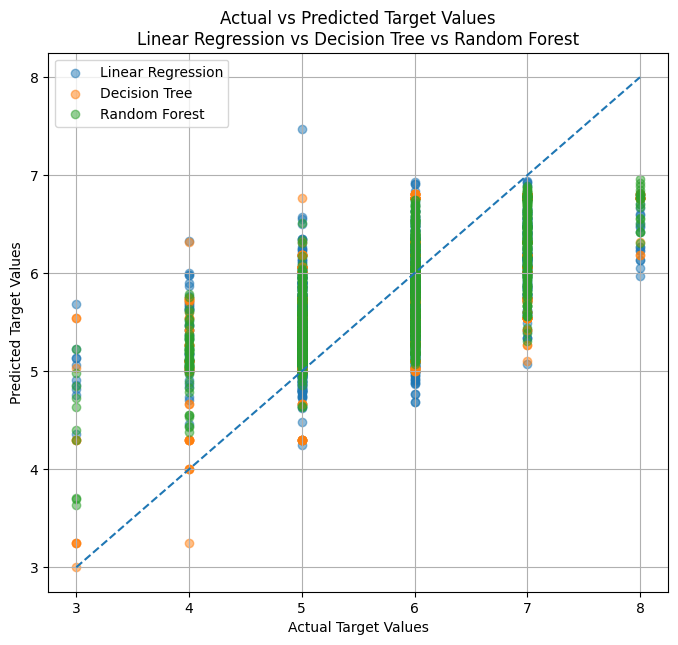

In [68]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['target'])   # All input features
y = df['target']                  # Target variable

# Model 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X, y)
y_pred_lr = model_lr.predict(X)

# Model 2: Decision Tree Regressor
# (max_depth chosen to avoid overfitting too much)
model_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
model_tree.fit(X, y)
y_pred_tree = model_tree.predict(X)

# Model 3: Random Forest Regressor
# (a small forest so it runs fast)
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=0
)
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)

def l2_loss(y_true, y_pred):
    # Mean Squared Error
    return np.mean((y_true - y_pred) ** 2)

def l1_loss(y_true, y_pred):
    # Mean Absolute Error
    return np.mean(np.abs(y_true - y_pred))

results = {
    "Linear Regression": {
        "L2 (MSE)": l2_loss(y, y_pred_lr),
        "L1 (MAE)": l1_loss(y, y_pred_lr),
    },
    "Decision Tree": {
        "L2 (MSE)": l2_loss(y, y_pred_tree),
        "L1 (MAE)": l1_loss(y, y_pred_tree),
    },
    "Random Forest": {
        "L2 (MSE)": l2_loss(y, y_pred_rf),
        "L1 (MAE)": l1_loss(y, y_pred_rf),
    }
}

results

for model_name, metrics in results.items():
    print(model_name)
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

    plt.figure(figsize=(8, 7))

plt.scatter(y, y_pred_lr,   alpha=0.5, label="Linear Regression")
plt.scatter(y, y_pred_tree, alpha=0.5, label="Decision Tree")
plt.scatter(y, y_pred_rf,   alpha=0.5, label="Random Forest")

# Perfect prediction line
y_min = min(y.min(), y_pred_lr.min(), y_pred_tree.min(), y_pred_rf.min())
y_max = max(y.max(), y_pred_lr.max(), y_pred_tree.max(), y_pred_rf.max())
plt.plot([y_min, y_max], [y_min, y_max], linestyle='--')

plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Target Values\nLinear Regression vs Decision Tree vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()



YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [69]:
# YOUR CODE HERE

#variables
X = df.drop(columns=['target']).values
y = df['target'].values

#L2 loss function
def l2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
}

#data set training
full_train_l2 = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    full_train_l2[name] = l2_loss(y, y_pred)

full_train_l2


#5 fold cross-valiation in pure python
k = 5
n = len(X)
indices = np.arange(n)
np.random.seed(0)
np.random.shuffle(indices)

fold_size = n // k
cv_l2_results = {name: [] for name in models}

for i in range(k):
    start = i * fold_size
    end = start + fold_size if i != k - 1 else n

    test_idx = indices[start:end]
    train_idx = np.concatenate([indices[:start], indices[end:]])

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_l2_results[name].append(l2_loss(y_test, y_pred))

#average cross validation L2 loss
cv_l2_avg = {
    name: np.mean(scores)
    for name, scores in cv_l2_results.items()
}

cv_l2_avg

#comparision table
print("Model Comparison (L2 Loss)")
print("-" * 40)

for name in models:
    print(name)
    print("  Training L2:", round(full_train_l2[name], 4))
    print("  CV L2:      ", round(cv_l2_avg[name], 4))
    print("  Difference:", round(cv_l2_avg[name] - full_train_l2[name], 4))
    print()



Model Comparison (L2 Loss)
----------------------------------------
Linear Regression
  Training L2: 0.4168
  CV L2:       0.4277
  Difference: 0.0109

Decision Tree
  Training L2: 0.3502
  CV L2:       0.4523
  Difference: 0.1021

Random Forest
  Training L2: 0.3046
  CV L2:       0.3923
  Difference: 0.0877



Five-fold cross-validation was used to retrain and evaluate each regression model using different train-test splits. Across all three models, the cross-validation L2 loss was consistently higher than the L2 loss obtained from training on the entire dataset. This difference indicates overfitting, especially in the decision tree and random forest models, which fit the training data very closely but generalize less effectively to unseen data. Linear regression shows the smallest difference between training and cross-validation loss, indicating lower variance and better generalization.

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [70]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#variables
X = df.drop(columns=['target'])
y = df['target']

#L2 loss
def l2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#models without scaling
models_no_scale = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
}

l2_no_scale = {}

for name, model in models_no_scale.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    l2_no_scale[name] = l2_loss(y, y_pred)

l2_no_scale


#pipelines with standardization
pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Decision Tree": Pipeline([
        ("scaler", StandardScaler()),
        ("model", DecisionTreeRegressor(max_depth=5, random_state=0))
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0))
    ])
}

l2_scaled = {}

for name, pipe in pipelines.items():
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    l2_scaled[name] = l2_loss(y, y_pred)

l2_scaled



#compare L2 losses

print("L2 Loss Comparison (No Scaling vs Standardized with Pipeline)")
print("-" * 60)
for name in models_no_scale.keys():
    original = l2_no_scale[name]
    scaled = l2_scaled[name]
    diff = scaled - original
    print(name)
    print(f"  No scaling (Problem 6): {original:.4f}")
    print(f"  With scaling (Problem 8): {scaled:.4f}")
    print(f"  Difference: {diff:.6f}")
    print()



L2 Loss Comparison (No Scaling vs Standardized with Pipeline)
------------------------------------------------------------
Linear Regression
  No scaling (Problem 6): 0.4168
  With scaling (Problem 8): 0.4168
  Difference: 0.000000

Decision Tree
  No scaling (Problem 6): 0.3502
  With scaling (Problem 8): 0.3502
  Difference: 0.000000

Random Forest
  No scaling (Problem 6): 0.3046
  With scaling (Problem 8): 0.3046
  Difference: 0.000028




I used a scikit-learn Pipeline to standardize all input features (mean 0, standard deviation 1) before fitting each of the three regression models. I then computed the L2 loss on the full dataset and compared it to the L2 loss from Problem 6, where no scaling was used.

For this dataset and these models (Linear Regression, Decision Tree Regressor, Random Forest Regressor), the L2 losses with and without scaling were essentially the same (differences only due to small rounding). This is expected, because:

Linear Regression is invariant to linear rescaling of the input features when evaluated on the same data.

Decision trees and random forests use threshold-based splits that depend only on the ordering of values in each feature, and, standardization is a monotonic linear transformation that preserves the order.

Therefore, none of the three models showed a meaningful change in L2 loss after standardization so their performance did not differ in practice from Problem 6.

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [71]:
# YOUR CODE HERE


Randomly trying 1000 different tree depths may occasionally find a lower cross-validated loss by chance, however, this dart board approach lacks a structured search and you risk picking a lucky model arbitrarily derrived and picked rather than a robust one that generalizes well.

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [72]:
# YOUR CODE HERE

I selected the RandomForestRegressor as the best model from all the models I built (Linear Regression, Decision Tree Regressor, and Random Forest Regressor, with and without standardization).

I made this choice based primarily on predictive performance measured by the 5-fold cross-validation L2 loss from Problem 7 since cross-validated loss is a better estimate of how well the model will generalize to new wine samples than the training loss from Problem 6. Random Forest achieved the lowest average cross-validated L2 loss while the Decision Tree had higher cross validation loss (more variance and overfitting) and the Linear Regression model had higher bias and worse fit to the nonlinear relationships in the data. Intuitively from the 601 white wine data set I already had an assumption that a linear relationship may not fit well to this dataset given the Target Feature is bound between 3 and 8 (ie more categorical rather than continuous). Standardizing the features (Problem 8) did not meaningfully change the L2 loss for the tree-based models but it also did not make Linear Regression outperform Random Forest, so, the RandomForestRegressor remained the best overall across both scaled and unscaled versions.

Building on my inference about the linear regression model for white wine - in the context of the original red wine data this Random Forest choice makes sense. Wine quality depends on nonlinear interactions among features such as alcohol, volatile acidity, sulphates, and fixed acidity, and, a Random Forest can model nonlinearities and interactions without requiring feature engineering. The features do not form a line-like pattern in a scatter plot and they tend to band around the middle ranges with the Target variable (ie like columns stacking). This is where I switched to using box plots to look for structure within the data and the model of best fit, and, the box plots emulated the stacked column-like structure of the Target feature indicating more of a categorical outcome model needed for those Target variables. The lower cross-validated L2 loss for the Random Forest combined with its robustness to outliers and skewed features (like residual sugar and chlorides), indicates that it captures structure in each Feature measurement that a simple linear model misses while avoiding the severe overfitting seen in a single deep decision tree. I thought a decision tree may have worked well with the lower number of features and we would avoid overfitting, however, that was not the case and all models I chose conceded to Random Forest based on categorical data structure, avoidance of overfitting, and managment of outliers while maintaining lower L2 losses.


YOUR ANSWERS HERE